The code here is preliminary and should be included in the library itself. For the moment I wrote it here so that it is availble for you as well.

In [1]:
from __future__ import print_function
import sys
import numpy as np
sys.path.append('../')

In [2]:
# import whatstk relevant libraries
import whatstk.parser as wp
import whatstk.vis as wv

/Users/lucasrodes/whatstk/.whatstk/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
# import pandas
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from stop_words import get_stop_words
import re

In [5]:
# Get chat
chat = wp.WhatsAppChat("../chats/samplechat.txt")

In [6]:
# Generate dataframe from parsed chat
df = pd.DataFrame(chat.parsed_chat, columns=["Date","User","Text"])

In [7]:
# Catalan
stopwords = get_stop_words('catalan')
stopwords.extend(["Ha", "ha", "La", "hem", "Hem", "ja", "Ja", "si", "Si", "que", "Que", "ok", "Ok", "Media", "el", "El", "Al", "al", "de", "del", "De", "Del", "omitted"])

In [8]:
# English
stopwords = get_stop_words('english')
stopwords.extend(["Media", "omitted", ""])
#stopwords.extend(["Ha", "ha", "La", "hem", "Hem", "ja", "Ja", "si", "Si", "que", "Que", "ok", "Ok", "Media", "el", "El", "Al", "al", "de", "del", "De", "Del", "omitted"])

In [9]:
# Gets the list of words (ignores stopwords) from a given user given its interventions 
def get_list_words(df):
    _text = df["Text"].str.cat(sep=".\n")
    text = re.sub("[^\w]", " ",  _text).split()
    return ' '.join([t for t in text if not t in stopwords])

In [10]:
# Get a wordcloud of words mentioned by each user. The interventions are concatenated and separated by ".\n"
_users = np.unique(df['User'])
users = dict.fromkeys(_users)
for user in users:
    text = get_list_words(df.loc[df['User'] == user])
    users[user] = WordCloud(background_color="white", width = 800, height = 400).generate(text)

In [11]:
# Method to plot a wordcloud
def plot_wordcloud(wordcloud, title):
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud) 
    plt.title(title, fontsize=30)
    plt.axis("off")
    plt.show()

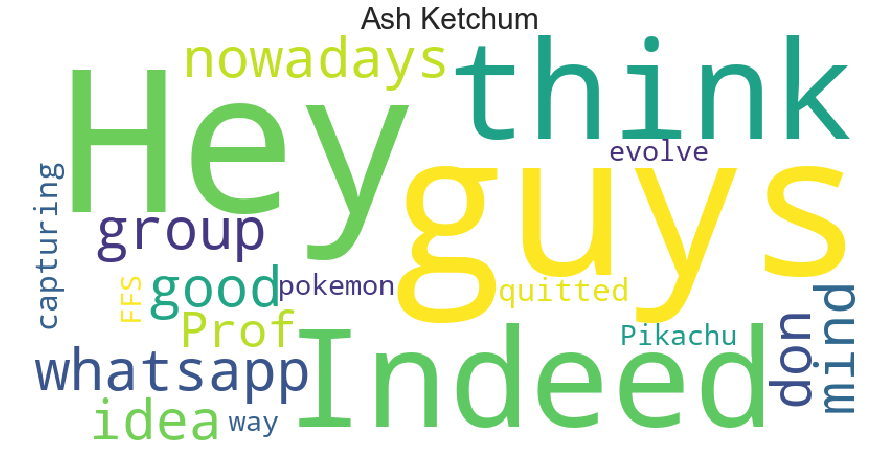

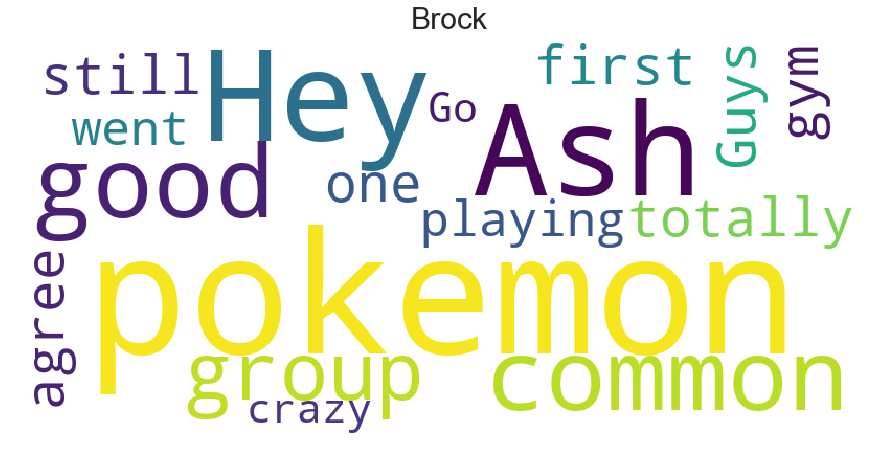

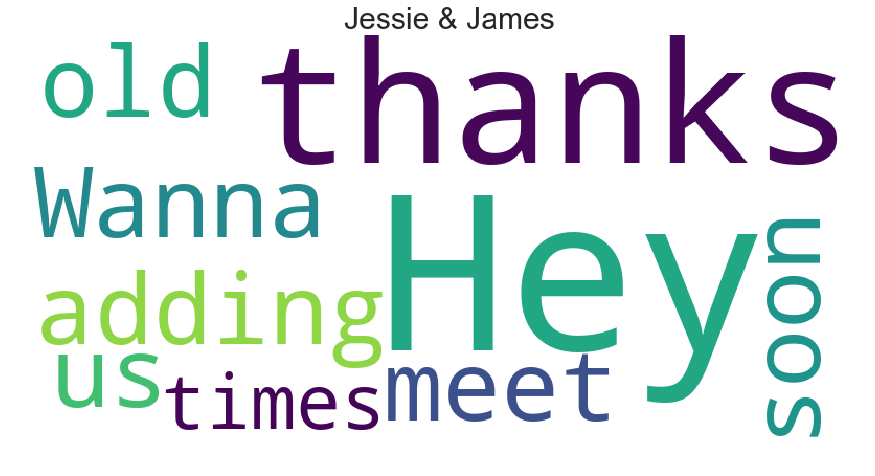

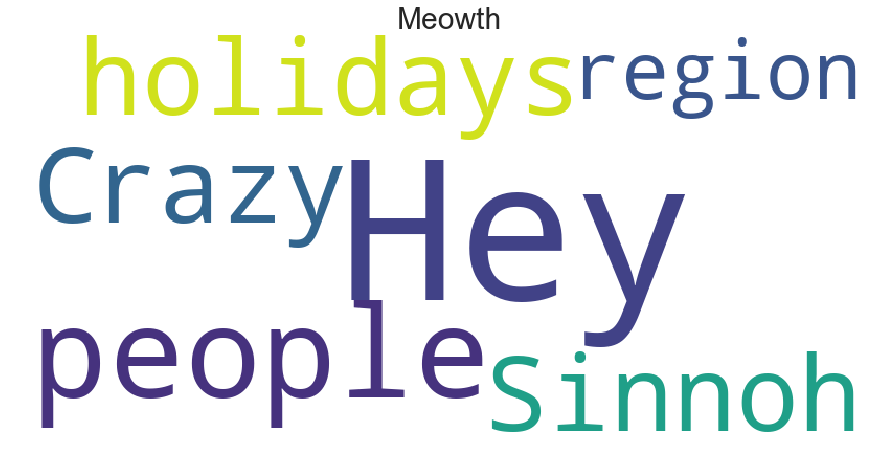

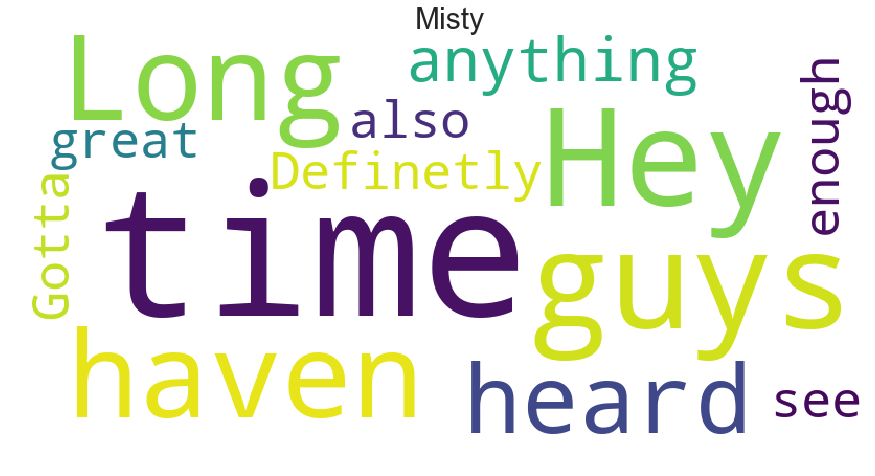

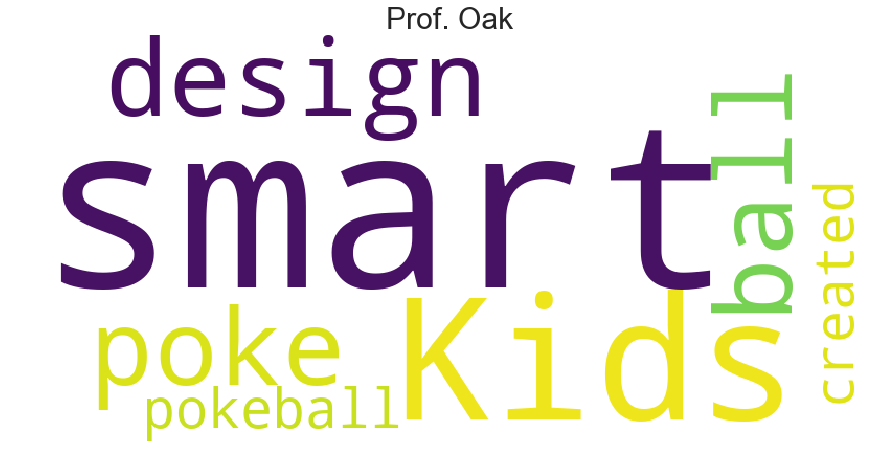

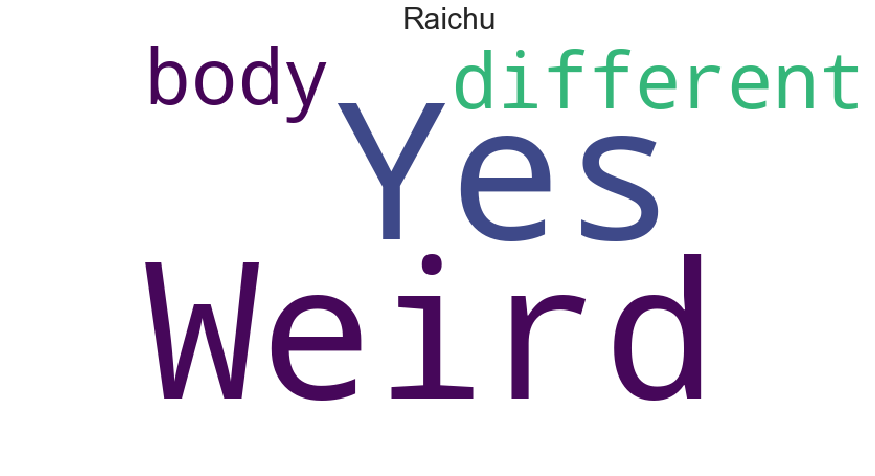

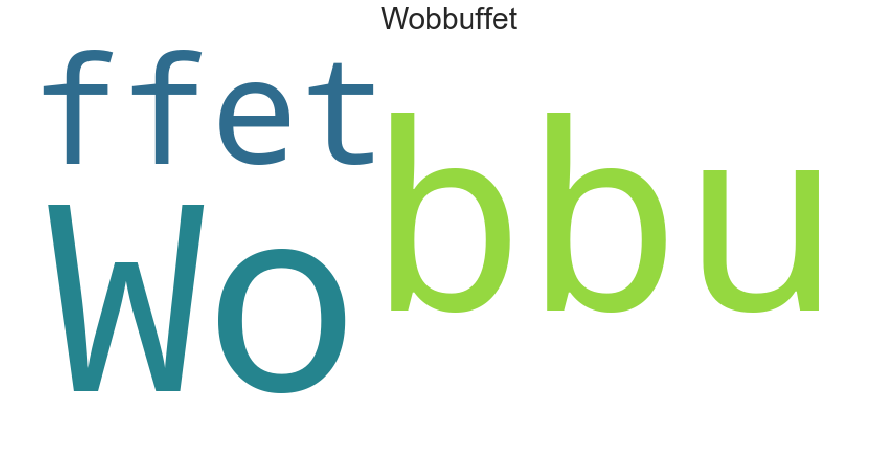

In [12]:
for user in users:
    plot_wordcloud(users[user], title=user)